### ATTRIBUTES:

1. country = Name of the country 
2. child_mort = Death of children under 5 years of age per 1000 live births 
3. exports = Exports of goods and services. Given as %age of the Total GDP 

4. health = Total health spending as %age of Total GDP 

5. imports =  Imports of goods and services. Given as %age of the Total GDP 

6. Income =  Net income per person 

7. Inflation =  The measurement of the annual growth rate of the Total GDP 

8. life_expec = The average number of years a new born child would live if the current mortality patterns are to remain the same 

9. total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same. 

10. gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population. 
 

In [2]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 	Data Understanding


In [3]:
#
df.shape #There are 1994 rows and 10 columns present in the dataset.

(1994, 10)

In [4]:
df.info() # There is one categorical feature and the rest are all continuous in nature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 10 columns):
country       1994 non-null object
child_mort    1994 non-null float64
exports       1994 non-null float64
health        1994 non-null float64
imports       1994 non-null float64
income        1994 non-null int64
inflation     1994 non-null float64
life_expec    1994 non-null float64
total_fer     1994 non-null float64
gdpp          1994 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 155.9+ KB


In [5]:

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,46.264845,40.897795,6.639102,46.688797,16206.971916,7.293361,69.970361,3.165587,13138.625376
std,45.875061,23.458995,2.697765,20.897354,17966.906767,9.218182,8.967489,1.722085,18465.680528
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.300000,23.800000,4.860000,30.400000,3060.000000,1.910000,60.800000,1.770000,1310.000000
50%,24.100000,39.200000,5.970000,43.600000,7350.000000,5.440000,72.100000,2.380000,3550.000000
75%,88.200000,51.300000,8.100000,57.500000,27200.000000,8.920000,77.400000,4.870000,17100.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#number of categories
cat=df.select_dtypes(include='O')
cat.columns

Index(['country'], dtype='object')

In [7]:
#percentage observation in each category
cat.country.value_counts(normalize=True)

Bhutan            0.064193
Austria           0.055165
Angola            0.055165
Burkina Faso      0.042628
Cameroon          0.034102
El Salvador       0.025075
Cyprus            0.023571
Denmark           0.023069
Chad              0.023069
Comoros           0.023069
China             0.020562
Czech Republic    0.019057
Fiji              0.014042
Argentina         0.012036
Egypt             0.004012
Guatemala         0.004012
India             0.004012
Albania           0.004012
Guinea-Bissau     0.004012
France            0.004012
Guinea            0.004012
Botswana          0.004012
Algeria           0.004012
Eritrea           0.004012
Hungary           0.004012
Bulgaria          0.004012
Indonesia         0.004012
Iran              0.004012
Bolivia           0.004012
Armenia           0.004012
                    ...   
Maldives          0.003511
Namibia           0.003511
South Korea       0.003511
Nepal             0.003511
Russia            0.003511
Latvia            0.003511
M

In [8]:

#correlation
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.271367,-0.406499,-0.188822,-0.596205,0.333879,-0.910413,0.918370,-0.542255
exports,-0.271367,1.000000,-0.066722,0.686172,0.498937,-0.026581,0.303846,-0.259949,0.404071
health,-0.406499,-0.066722,1.000000,0.057098,0.373230,-0.344755,0.399734,-0.391011,0.543551
imports,-0.188822,0.686172,0.057098,1.000000,0.122371,-0.237108,0.145343,-0.228377,0.099382
income,-0.596205,0.498937,0.373230,0.122371,1.000000,-0.207267,0.678720,-0.567905,0.916825
inflation,0.333879,-0.026581,-0.344755,-0.237108,-0.207267,1.000000,-0.298859,0.377672,-0.270106
life_expec,-0.910413,0.303846,0.399734,0.145343,0.678720,-0.298859,1.000000,-0.840173,0.649860
total_fer,0.918370,-0.259949,-0.391011,-0.228377,-0.567905,0.377672,-0.840173,1.000000,-0.511984
gdpp,-0.542255,0.404071,0.543551,0.099382,0.916825,-0.270106,0.649860,-0.511984,1.000000


In [9]:
#covariance
df.cov()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,2104.521227,-292.040746,-50.308319,-181.017258,-4.914116e+05,141.192120,-374.529281,72.551871,-4.593518e+05
exports,-292.040746,550.324434,-4.222631,336.382873,2.102948e+05,-5.748031,63.919585,-10.501505,1.750382e+05
health,-50.308319,-4.222631,7.277935,3.218983,1.809066e+04,-8.573526,9.670428,-1.816552,2.707760e+04
imports,-181.017258,336.382873,3.218983,436.699385,4.594534e+04,-45.675432,27.236760,-8.218605,3.834996e+04
income,-491411.635559,210294.788487,18090.660502,45945.344164,3.228097e+08,-34328.076136,109354.110808,-17571.277956,3.041760e+08
inflation,141.192120,-5.748031,-8.573526,-45.675432,-3.432808e+04,84.974880,-24.704892,5.995355,-4.597739e+04
life_expec,-374.529281,63.919585,9.670428,27.236760,1.093541e+05,-24.704892,80.415855,-12.974603,1.076109e+05
total_fer,72.551871,-10.501505,-1.816552,-8.218605,-1.757128e+04,5.995355,-12.974603,2.965575,-1.628080e+04
gdpp,-459351.786182,175038.225288,27077.595941,38349.956285,3.041760e+08,-45977.385945,107610.866362,-16280.801805,3.409814e+08


In [10]:
#1d pairplot among various features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

<Figure size 2250x2250 with 90 Axes>

### 	Data Preparation 

In [11]:
#check for null values
df.isna().sum() #There is no null value present in the dataset

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
#Dropping the country column
Y=df['country']
X=df.drop('country',axis=1)

In [13]:
#Transforming the data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
p=pt.fit_transform(X)
p1=pd.DataFrame(p)
p1.head()

,0,1,2,3,4,5,6,7,8
0,1.064570,-1.879905,0.488233,0.037327,-1.358711,0.529778,-1.453746,1.369290,-1.489653
1,-0.353725,-0.476615,0.122190,0.220848,0.098395,-0.127136,0.683256,-0.993390,-0.041833
2,0.043257,0.065384,-0.931973,-0.720129,0.317489,1.166462,0.711726,0.189747,0.016370
3,1.313300,1.015775,-1.722789,-0.065576,-0.330268,1.643958,-1.141407,1.448162,-0.141609
4,-0.715262,0.381274,-0.079837,0.692165,0.650736,-0.742409,0.754728,-0.434261,0.667292


In [14]:
#stardardizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
s=sc.fit_transform(p1)
df1=pd.DataFrame(s)
df1.head()

,0,1,2,3,4,5,6,7,8
0,1.064570,-1.879905,0.488233,0.037327,-1.358711,0.529778,-1.453746,1.369290,-1.489653
1,-0.353725,-0.476615,0.122190,0.220848,0.098395,-0.127136,0.683256,-0.993390,-0.041833
2,0.043257,0.065384,-0.931973,-0.720129,0.317489,1.166462,0.711726,0.189747,0.016370
3,1.313300,1.015775,-1.722789,-0.065576,-0.330268,1.643958,-1.141407,1.448162,-0.141609
4,-0.715262,0.381274,-0.079837,0.692165,0.650736,-0.742409,0.754728,-0.434261,0.667292


### 	Dimensionality Reduction


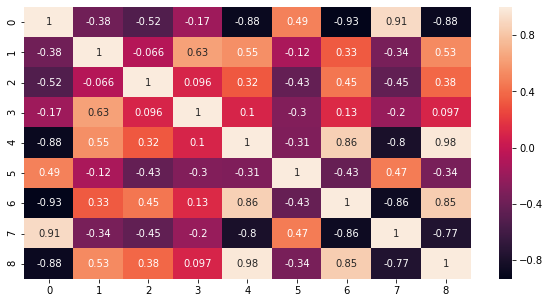

In [15]:
# correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True)

In [16]:
#There is some multicollinearity present in the dataset.So, due to this reason to reduce the multicollinearity effect
#we will apply PCA.

In [17]:
# Application of PCA
#pca will all the variables
from sklearn.decomposition import PCA
model=PCA(n_components=9)
pca_val=model.fit_transform(df1)
pca_val.shape

(1994, 9)

In [18]:
eigenvals=model.explained_variance_

In [19]:
tot=sum(eigenvals)
var_exp=[(i/tot)*100 for i in sorted(eigenvals,reverse=True)]
cum_var=np.cumsum(var_exp)
print('Cummulative variance',cum_var)

Cummulative variance [ 58.18827331  74.58574938  87.30713199  93.15613578  96.96433641
  98.44133739  99.35521559  99.85525147 100.        ]


In [20]:
#pca for 90% variance
model=PCA(n_components=5)
pca_val5=model.fit_transform(df1)
pca_val5.shape

(1994, 5)

In [21]:
eigenvals=model.explained_variance_

In [22]:
tot=sum(eigenvals)
var_exp=[(i/tot)*100 for i in sorted(eigenvals,reverse=True)]
cum_var=np.cumsum(var_exp)
print('Cummulative variance',cum_var)

Cummulative variance [ 60.00997425  76.92080629  90.04045738  96.07257599 100.        ]


In [23]:
#Therefore, 5 components contribute to 93% variance of the data.

In [25]:
# Dataframe with pca components
pca_df=X.iloc[:,:5]
pca_df.head()

,child_mort,exports,health,imports,income
0,90.2,10.0,7.58,44.9,1610
1,16.6,28.0,6.55,48.6,9930
2,27.3,38.4,4.17,31.4,12900
3,119.0,62.3,2.85,42.9,5900
4,10.3,45.5,6.03,58.9,19100


In [26]:
pca_df.corr()

,child_mort,exports,health,imports,income
child_mort,1.000000,-0.271367,-0.406499,-0.188822,-0.596205
exports,-0.271367,1.000000,-0.066722,0.686172,0.498937
health,-0.406499,-0.066722,1.000000,0.057098,0.373230
imports,-0.188822,0.686172,0.057098,1.000000,0.122371
income,-0.596205,0.498937,0.373230,0.122371,1.000000


In [27]:
#Multicollinearity has been reduced in the pca component variables after the application of pca.

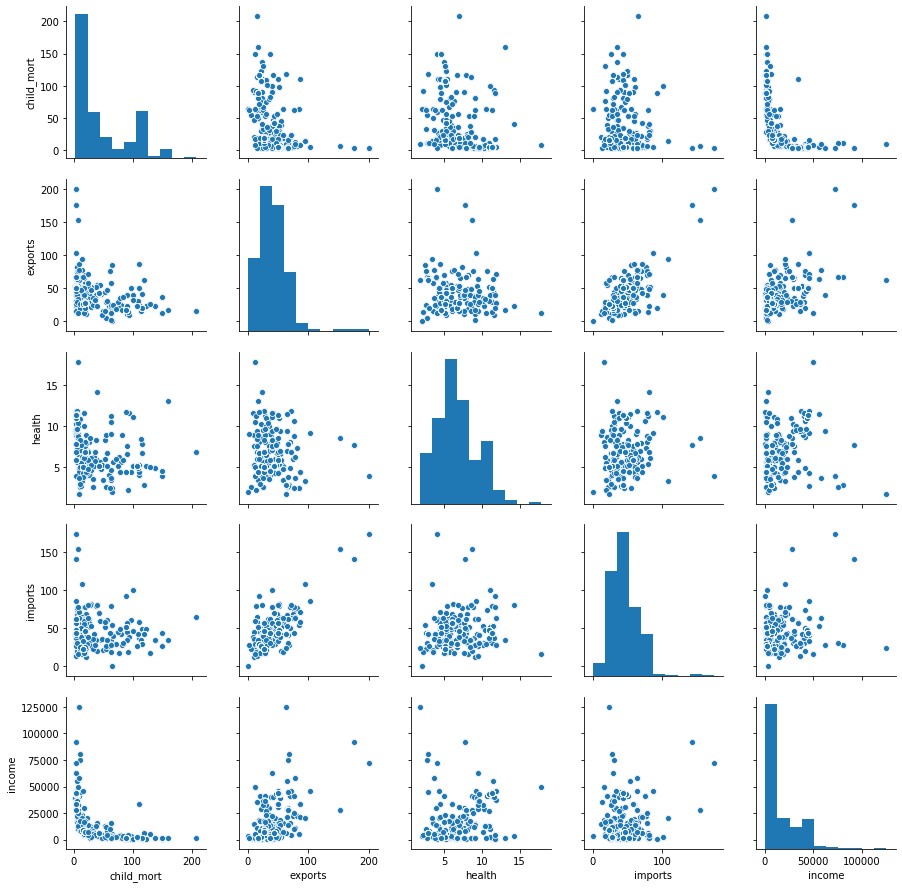

In [28]:
# Spread of data
sns.pairplot(pca_df)

In [29]:
#All the pca components are randomly distributed.

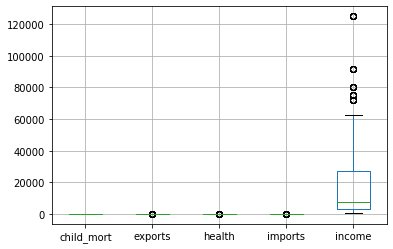

In [30]:
#check for outliers
pca_df.boxplot()
plt.show()

In [31]:
#There is presence of some outliers in the df containing pca components.We wont eliminate the outliers due to data loss.

### 	Clustering: Using PCA dimensions to cluster the data. Applying K-means and Agglomerative clustering. 


a.	Applying Clustering and visualizing the spread of data

b.  Finding the optimal number of cluster Value. 

c.	Evaluating the clusters formed using appropriate metrics (inertia, silhouette score) to support the model built and comparing both the models.

d.	Using best attributes based on the relationship between them, ploting the clusters. 


In [32]:
#clustering
from sklearn.cluster import KMeans
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=5,random_state=10)
    clusters.fit(df1)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({'n_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[:15]

,n_clusters,cluster_errors
0,1,17946.000000
1,2,10279.010978
2,3,8036.197885
3,4,6830.237941
4,5,5880.571042
5,6,5198.537887
6,7,4836.977738
7,8,4704.137714
8,9,4379.998894
9,10,4067.142536


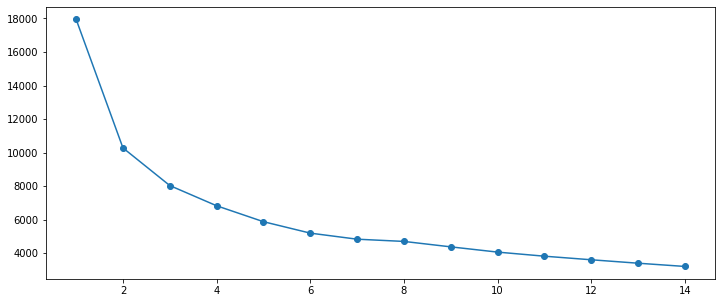

In [33]:
plt.figure(figsize=[12,5])
plt.plot(clusters_df.n_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [34]:
#From this we can observe a bend at 2.Therefore, we will be considering our k value as 2.

In [35]:
#Fitting kmeans value based on elbow plot
kmeans=KMeans(n_clusters=2)
m1=kmeans.fit(df1)
clusters=m1.predict(df1)
df_k=X.copy(deep=True)
df_k['label']=clusters
df_k.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [36]:
df_centers=pd.DataFrame(m1.cluster_centers_)
df_centers

,0,1,2,3,4,5,6,7,8
0,-0.88727,0.315891,0.488866,0.032596,0.817496,-0.422134,0.852341,-0.834481,0.813946
1,0.84048,-0.299232,-0.463086,-0.030877,-0.774386,0.399873,-0.807393,0.790475,-0.771023


In [37]:
m1.inertia_

10279.290258701705

In [38]:
df_k['label'].value_counts()

1    1024
0     970
Name: label, dtype: int64

In [39]:
#Spread of data for 2 clusters.

In [40]:
from sklearn.metrics import silhouette_samples,silhouette_score
x=df1.values
silhouette_score(x,clusters)

0.3678729427773526

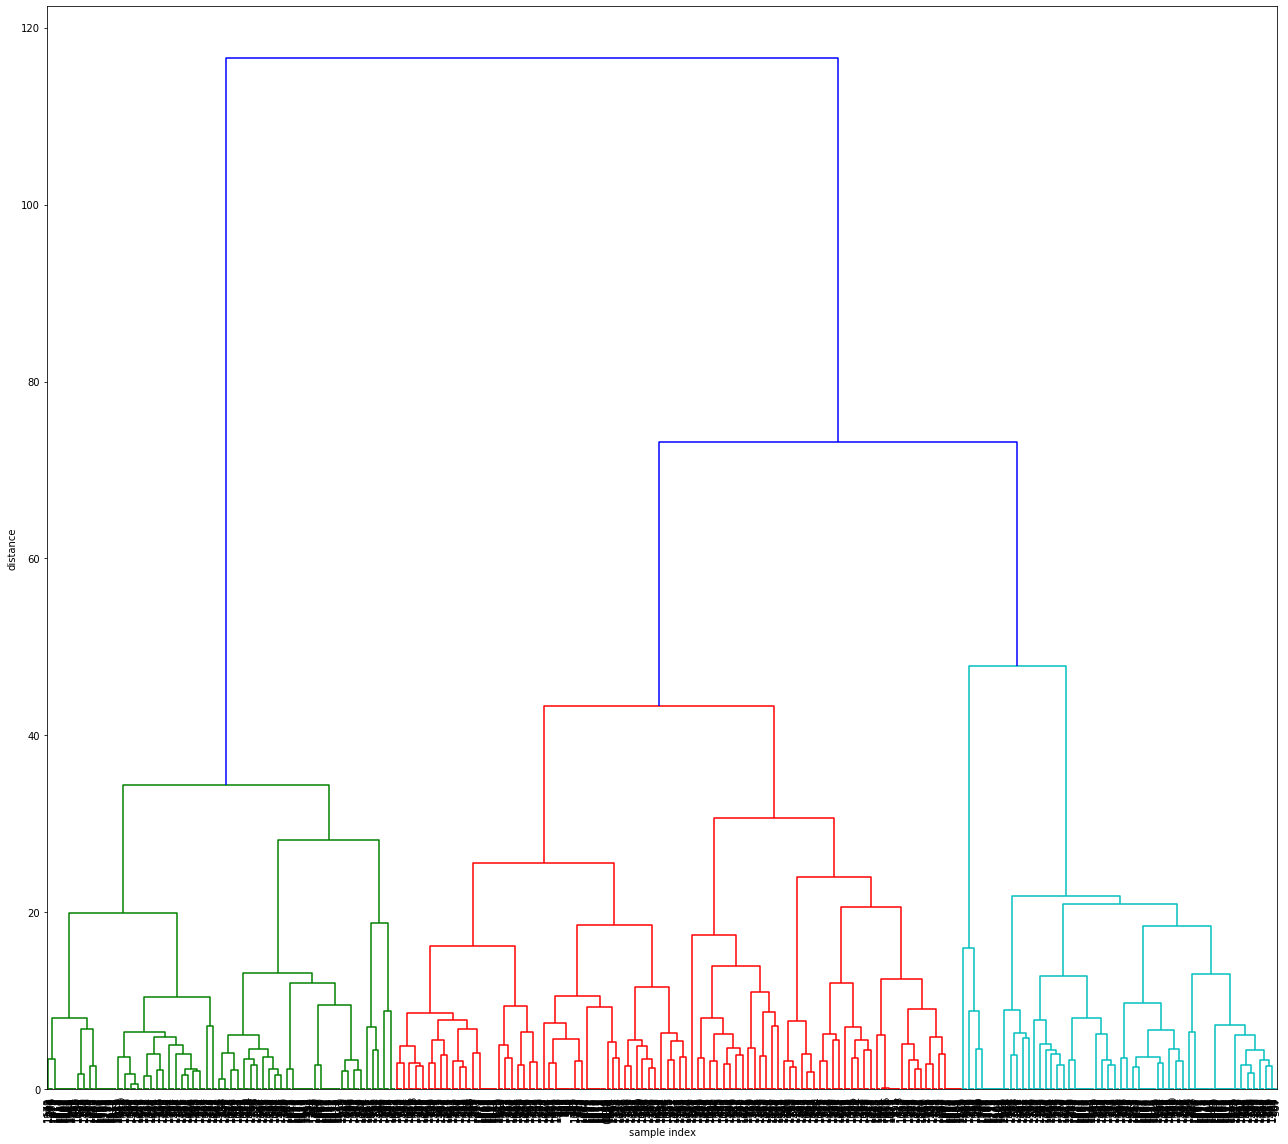

In [41]:
#dendrogram
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18,16))
plt.xlabel('sample index')
plt.ylabel('distance')
z=linkage(df1,'ward')
dendrogram(z,leaf_rotation=90.0,p=30,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [42]:
#From the dendrogram we can observe the presence of just 2 clusters evidently.

In [43]:
#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hie_clus=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster2=hie_clus.fit_predict(df1)
df_h=X.copy(deep=True)
df_h['label']=cluster2
df_h['label'].value_counts()

0    1441
1     553
Name: label, dtype: int64

In [44]:
#elbow plot for pca with optimum number of components
from sklearn.cluster import KMeans
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters_pca=KMeans(num_clusters,n_init=5,random_state=10)
    clusters_pca.fit(pca_val5)
    labels=clusters_pca.labels_
    centroids=clusters_pca.cluster_centers_
    cluster_errors.append(clusters_pca.inertia_)
clusters_df=pd.DataFrame({'n_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[:15]

,n_clusters,cluster_errors
0,1,17401.219811
1,2,9736.511160
2,3,7497.758439
3,4,6292.135425
4,5,5345.555823
5,6,4670.186461
6,7,4320.897688
7,8,4066.488383
8,9,3728.475492
9,10,3488.801449


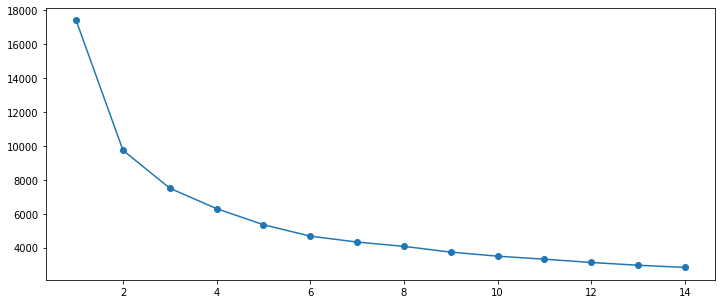

In [45]:
plt.figure(figsize=[12,5])
plt.plot(clusters_df.n_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [46]:
#kmeans for pca with optimum components
kmeans=KMeans(n_clusters=2)
m_pca=kmeans.fit(pca_val5)
clusters_pca=m_pca.predict(pca_val5)
df_k_pca=X.copy(deep=True)
df_k_pca['label']=clusters_pca
df_k_pca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


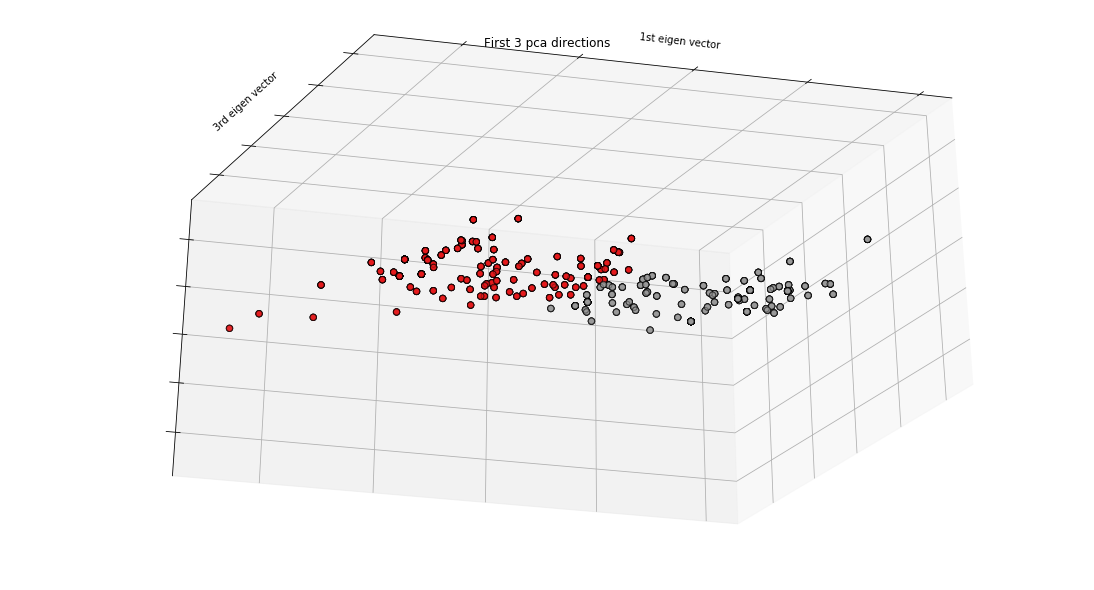

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(15,8))
ax=Axes3D(fig,elev=150,azim=110)
x_reduced=PCA(n_components=5).fit_transform(df1)
ax.scatter(x_reduced[:,0],x_reduced[:,1],c=m_pca.labels_,cmap=plt.cm.Set1,edgecolor='k',s=40)
ax.set_title('First 3 pca directions')
ax.set_xlabel('1st eigen vector')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd eigen vector')
ax.w_yaxis.set_ticklabels([])
ax.set_ylabel('3rd eigen vector')
ax.w_zaxis.set_ticklabels([])
plt.show()

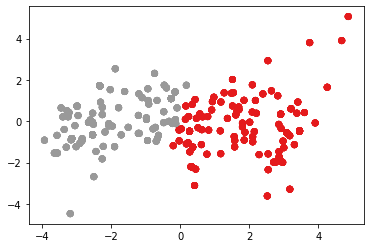

In [48]:
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=m_pca.labels_,cmap=plt.cm.Set1)
plt.show()

In [49]:
#comparison of inertia and silhuotte score for models with and without pca

Model without pca (metrics)

In [50]:
m1.inertia_

10279.290258701705

In [51]:
from sklearn.metrics import silhouette_samples,silhouette_score
x=df1.values
silhouette_score(x,clusters)

0.3678729427773526

Model with pca(metrics)

In [52]:
m_pca.inertia_

9736.511159888609

In [53]:
from sklearn.metrics import silhouette_samples,silhouette_score
x=pca_df.values
silhouette_score(x,clusters_pca)

0.436110228662514

In [54]:
df_k['label'].value_counts()

1    1024
0     970
Name: label, dtype: int64

In [55]:
#Comparison between both the models
print('Kmeans data class')
print(df_k.label.value_counts())

Kmeans data class
1    1024
0     970
Name: label, dtype: int64


In [56]:
print('Hierarchical data class')
print(df_h.label.value_counts())

Hierarchical data class
0    1441
1     553
Name: label, dtype: int64


In [57]:
df_new=pd.concat([Y,df_k_pca],axis=1)
df_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [83]:
underdev_df=df_new[df_new.label==1]
dev_df=df_new[df_new.label==0]

### 	Using the cluster labels from the best method above and interpreting the clusters formed. 

In [84]:
underdev_df.country.unique() #The ones with label 1 are underdeveloped countries and here are those countries listed 
#below

array(['Afghanistan', 'Algeria', 'Angola', 'Bangladesh', 'Benin',
       'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji',
       'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Mongolia', 'Morocco', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan',
       'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga',
       'Turkmenistan', 'Uganda', 'Uzbekistan', 'Va

In [85]:
dev_df.country.unique() #The ones with label 0 are developed countries and here are those countries listed below

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius',
       'Moldova', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Singapore', 'Slovak Republic', 

### 	Summarization


In [61]:
# model building with kmeans model
from sklearn.model_selection import train_test_split
x=df_k.drop('label',axis=1)
y=df_k['label']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf=RandomForestClassifier(max_depth=3)
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
print('Accuracy',metrics.accuracy_score(ytest,pred))

Accuracy 1.0


In [63]:
print('Classification report',metrics.classification_report(ytest,pred))

Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       313

    accuracy                           1.00       599
   macro avg       1.00      1.00      1.00       599
weighted avg       1.00      1.00      1.00       599



In [64]:
#The model with kmeans has given a good accuracy of 99.4 percent.
#The recall of the model is also 99%.
#Hence, we can say that it is a good model.

In [65]:
#model builing for pca based model
x=df_h.drop('label',axis=1)
y=df_h['label']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf=RandomForestClassifier(max_depth=3)
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
print('Accuracy',metrics.accuracy_score(ytest,pred))

Accuracy 0.993322203672788


In [67]:
print('Classification report',metrics.classification_report(ytest,pred))

Classification report               precision    recall  f1-score   support

           0       0.99      1.00      1.00       441
           1       1.00      0.97      0.99       158

    accuracy                           0.99       599
   macro avg       1.00      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599



In [68]:
#The model using pca has also yielded a good accuracy of 99.3%
#The recall of the model is 99% as well.
#Hence, we can say that this model is a good model.

Comparing both the cluster models

In [69]:
#On comparing both the cluster model, we can infer from its accuracy and recall that both the models are generalized
#model and are suitable for efficient prediction.

Business interpretation

In [ ]:
#From the clustering, we can say that there exits 2 group of people. They are clustered on the basis of country
#The first cluster is grouped on the basis of people from developed countries
#The next cluster is grouped on the basis of people from backward countries.
#There are nly equal set of people in both the groups.

In [86]:
#Average gdp for under developed countries
underdev_df.gdpp.mean()

2073.9655511811025

In [90]:
#Average gdp for developed countries
dev_df.gdpp.mean()

24633.200408997956

In [91]:
#Hence, on the basis of gdpp, the underdeveloped countries are 12times lesser than that of developed countries.
#Hence, we need to focus on this group of country for improvement rather than the already developed countries.

In [95]:
#Average health for under developed countries
underdev_df.health.mean()

5.409911417322812

In [99]:
#avg life expectancy 
underdev_df.life_expec.mean()

62.92066929133858

In [96]:
#Average health for developed countries
dev_df.health.mean()

7.916053169734153

In [101]:
#avg life expectancy
dev_df.life_expec.mean()

77.29396728016386

In [97]:
#Even, on the basis of health and life expectancy , the underdeveloped countries are lesser than the developed countries.
#Hence, this also proves that underdeveloped countries needs further growth.

In [ ]:
#We have compared both the models on the basis of 3 most important aspect gdp,health and life expectancy.
#Both gives us a same result stating label 1 (under developed countries) are far backward in both their economic and health 
#aspect as compared to the label 0 (developed countries)

In [ ]:
#Risk
#We can come to a further better conclusion with the inclusive of more additional aspects from each set of countries.
#Underdeveloped countries are at a risk of bad health conditions and poverty and high child mortality rate.